In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('C:/Users/iamso/Documents/encoded_dataset.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Whitelist,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,Whitelist,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,Whitelist,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,Whitelist,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,Whitelist,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884


In [3]:
df = df[df['list'] == 'Blacklist']
df.reset_index(drop=True, inplace=True)
df.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Blacklist,71168,4.699615,300,882,545,610,796,786,285,406,849,932,677,71,145,26,511,838,850
1,Blacklist,602112,6.255951,7,516,323,571,333,893,471,146,40,955,368,628,560,381,678,803,197
2,Blacklist,3020256,6.428692,239,753,30,42,678,366,24,391,284,496,208,86,925,374,238,873,232
3,Blacklist,559864,6.928873,821,1004,8,112,478,715,877,417,173,305,420,547,324,665,331,357,745
4,Blacklist,106496,6.054325,980,85,529,821,453,630,899,459,217,393,804,846,435,537,111,369,633


#### Encoding categorical variables:

To be able to apply clustering algorithm, we have to encode categorical data into numerical.

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['list'] = labelencoder.fit_transform(df['list'])
df.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,0,71168,4.699615,300,882,545,610,796,786,285,406,849,932,677,71,145,26,511,838,850
1,0,602112,6.255951,7,516,323,571,333,893,471,146,40,955,368,628,560,381,678,803,197
2,0,3020256,6.428692,239,753,30,42,678,366,24,391,284,496,208,86,925,374,238,873,232
3,0,559864,6.928873,821,1004,8,112,478,715,877,417,173,305,420,547,324,665,331,357,745
4,0,106496,6.054325,980,85,529,821,453,630,899,459,217,393,804,846,435,537,111,369,633


## Table of Contents

#### First Section: Loading of the Data Set
  

#### Second Section: Exploratory DA and Data Preparation
   
   
#### Third Section: Clustering 
* A) K-Means Clustering
* B) K-Medoids
* C) DBSCAN
* D) Optics Clustering Algorithm
* E) Agglomerative Hierarchical Clustering
* F) Fuzzy C-Means Clusterings

## First Section: Loading of the Data Set

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 
import warnings

warnings.filterwarnings('ignore') # We can suppress the warnings

## Second Section: Data Exploration and Data Preperation

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114737 entries, 0 to 114736
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   list         114737 non-null  int32  
 1   length       114737 non-null  int64  
 2   entropy      114737 non-null  float64
 3   md5_int1     114737 non-null  int64  
 4   md5_int2     114737 non-null  int64  
 5   md5_int3     114737 non-null  int64  
 6   md5_int4     114737 non-null  int64  
 7   sha1_int1    114737 non-null  int64  
 8   sha1_int2    114737 non-null  int64  
 9   sha1_int3    114737 non-null  int64  
 10  sha1_int4    114737 non-null  int64  
 11  sha1_int5    114737 non-null  int64  
 12  sha256_int1  114737 non-null  int64  
 13  sha256_int2  114737 non-null  int64  
 14  sha256_int3  114737 non-null  int64  
 15  sha256_int4  114737 non-null  int64  
 16  sha256_int5  114737 non-null  int64  
 17  sha256_int6  114737 non-null  int64  
 18  sha256_int7  114737 non-

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
count,114737.0,1.147370e+05,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.00000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000
mean,0.0,7.361402e+05,6.737332,503.848645,503.423882,504.601977,502.348606,503.952936,503.215092,502.070544,504.459154,504.22013,505.301969,503.245832,505.771460,504.060024,504.370578,504.022050,503.775513,504.067685
std,0.0,1.267221e+06,1.190021,290.664719,291.658407,291.532592,290.361301,290.723671,291.494576,291.674954,291.334308,291.24052,291.214394,291.212942,291.173584,291.197651,291.465275,291.361439,291.221004,290.815958
min,0.0,5.120000e+02,0.005894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.263360e+05,6.243894,253.000000,251.000000,252.000000,252.000000,253.000000,251.000000,249.000000,252.000000,252.00000,253.000000,252.000000,253.000000,253.000000,251.000000,251.000000,252.000000,252.000000
50%,0.0,3.237200e+05,6.920258,503.000000,503.000000,506.000000,501.000000,505.000000,503.000000,501.000000,505.000000,505.00000,506.000000,502.000000,507.000000,504.000000,505.000000,504.000000,503.000000,505.000000
75%,0.0,7.429490e+05,7.690613,754.000000,757.000000,757.000000,753.000000,755.000000,755.000000,754.000000,756.000000,757.00000,757.000000,755.000000,758.000000,755.000000,757.000000,757.000000,755.000000,755.000000
max,0.0,4.198810e+07,7.999952,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.00000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000


In [7]:
df.shape

(114737, 20)

In [8]:
df.isnull().sum().sort_values(ascending=False)

list           0
length         0
sha256_int7    0
sha256_int6    0
sha256_int5    0
sha256_int4    0
sha256_int3    0
sha256_int2    0
sha256_int1    0
sha1_int5      0
sha1_int4      0
sha1_int3      0
sha1_int2      0
sha1_int1      0
md5_int4       0
md5_int3       0
md5_int2       0
md5_int1       0
entropy        0
sha256_int8    0
dtype: int64

## Prepare dataset to apply Clustering algorithm and models

#### 1st step is to split the dataframe into independent variables and target data: <br>
We will create "X" including the independent variables, and variable "y1" including only the target variable "class"

In [9]:
X = df[['length', 'entropy', 'sha1_int3']]
y = df[['list']]

In [10]:
feature_names = np.array(X.columns)
feature_names

array(['length', 'entropy', 'sha1_int3'], dtype=object)

#### To prepare the dataframe "X" for further processing, we will scale the data: <br>
We will use the MinMaxScaler imported from the sklearn library. We will create a new dataframe called "df_scaled".

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=feature_names)
df_scaled.head()

,length,entropy,sha1_int3
0,0.001683,0.587151,0.282738
1,0.014328,0.781838,0.467262
2,0.071920,0.803447,0.023810
3,0.013322,0.866016,0.870040
4,0.002524,0.756616,0.891865


In [12]:
df_scaled.shape

(114737, 3)

# Third Section: Machine Learning Models <br>
In the following we will apply different clustering models 

## A) K-means Clustering

#### As the first step, we will have to choose the number of clusters K. We will use Elbow method to determine them <br>
##### Application of Elbow method to find best suitable number of clusters for our dataset
K-means Clustering: predictions are based on the number of centroids present (K) and nearest mean values, given an Euclidean Distance measurement between observations.

#### In the following we will use the Inertia and Silhouette Score to evaluate best K-means model

To consider for interpretation: <br>
<b> Inertia </b> measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. <br>
A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet#:~:text=Inertia%20measures%20how%20well%20a,number%20of%20clusters%20(%20K%20).

To consider for interpretation of the Silhouette Score: <br>
The Silhouette Score is a measure of Cohesion and Seperation of clusters. <br>
The <b> silhouette score </b> falls within range [-1,1] <br>
The silhouette score of 1 means that the clusters are very dense and nicely separated and have strong cohesion and seperation. The score o means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

Next, we will be analysing the Silhouette Score using Silhouette Visualizer method to decide how many clusters give the best score. <br>
We will also install sklearn.utils and -U imbalanced-learn from the sklearn library.

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

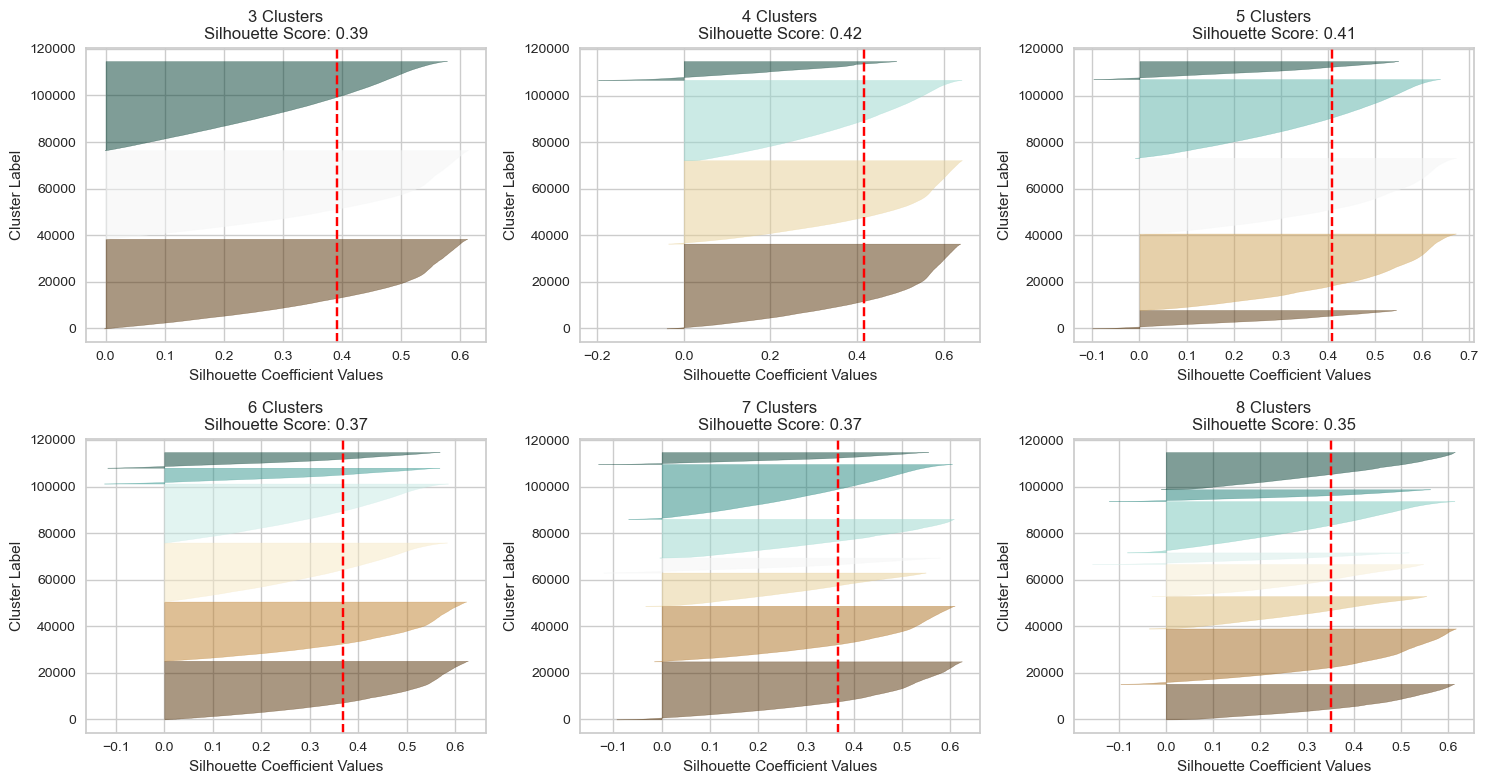

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for i, ax_row in enumerate(ax):
    for j, ax_col in enumerate(ax_row):
        n_clusters = i * 3 + j + 3  # Calculate the number of clusters
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
        
        visualizer = SilhouetteVisualizer(km, colors='BrBG', ax=ax_col)
        visualizer.fit(df_scaled)
        
        silhouette_score = visualizer.silhouette_score_
        ax_col.set_title(f"{n_clusters} Clusters\nSilhouette Score: {silhouette_score:.2f}")
        ax_col.set_xlabel("Silhouette Coefficient Values")
        ax_col.set_ylabel("Cluster Label")

plt.tight_layout()
plt.show()

 In addition, we will check the best silhouette score using Elbow Method on the df_scaled dataframe.

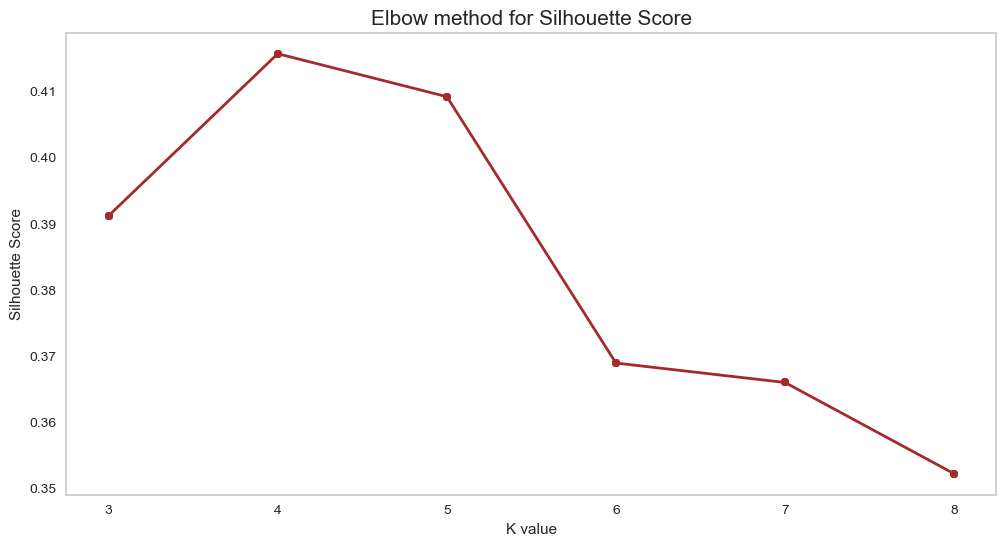

In [14]:
from sklearn.metrics import silhouette_score

sil_scores = []

for i in [3,4,5,6,7,8]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, km.predict(df_scaled)))
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([3,4,5,6,7,8], sil_scores, linewidth=2, color='brown', marker = '8')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.title('Elbow method for Silhouette Score', fontsize=15)
plt.show()

Based on the above we can clearly see that the highest Silhouette Score we can get while running Kmeans clustering using 4 clusters.

#### Checking the best number of clusters with Inertia:

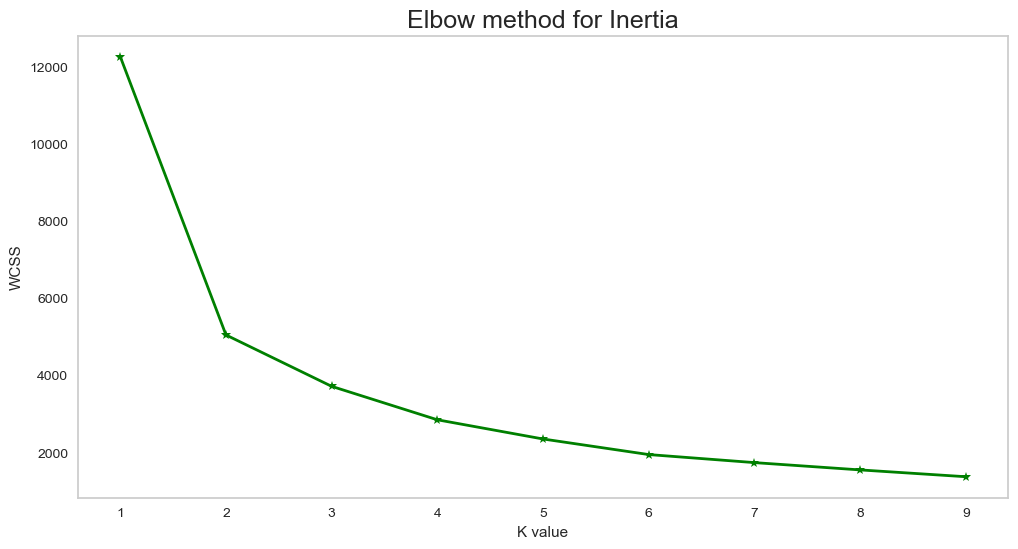

In [15]:
wcss=[]

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,10), wcss, linewidth=2, color='green', marker = '*')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('Elbow method for Inertia', fontsize=18)
plt.show()

We can conclude that if we will take into consideration both Silhouette Score and Inertia(WCSS)thatbest number of clusters for our dataset is 4.

## Apply  K-means with 4 clusters to raw data 

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = kmeans.fit(df_scaled)
inertia = kmeans.inertia_
print('The clusters are:  ', kmeans.labels_)
print('The Inertia is:   ', kmeans.inertia_ )

The clusters are:   [3 2 0 ... 2 2 0]
The Inertia is:    2846.1901626033


In the following we will make predictions for new data, with new clusters created. We will first calculate the counts of the cluster and then create a data frame called "countscldf_1". As a last step, we will print the new data frame countscldf_1

In [15]:
km_label = kmeans.predict(df_scaled)


unique, counts = np.unique(km_label, return_counts=True)
counts = counts.reshape(1,4)


countscldf = pd.DataFrame(counts, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])


countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,36388,35777,34503,8069


In [16]:
silh_score = silhouette_score(df_scaled, km_label)
print(f'Silhouette Score: {silh_score}')

Silhouette Score: 0.41567712705673615


In [17]:
df_kmeans = df_scaled

In [18]:
columns = ['km_label']
km_label = pd.DataFrame(data=km_label, columns=columns)
km_label.head()
print(km_label.value_counts())

km_label
0           36388
1           35777
2           34503
3            8069
Name: count, dtype: int64


In [19]:
df_kmeans = pd.concat([df_kmeans, km_label,y], axis=1)
df_kmeans.head()

,length,entropy,sha1_int3,km_label,list
0,0.001683,0.587151,0.282738,3,0
1,0.014328,0.781838,0.467262,2,0
2,0.071920,0.803447,0.023810,0,0
3,0.013322,0.866016,0.870040,1,0
4,0.002524,0.756616,0.891865,1,0


### Visualize original data vs Clustered Data

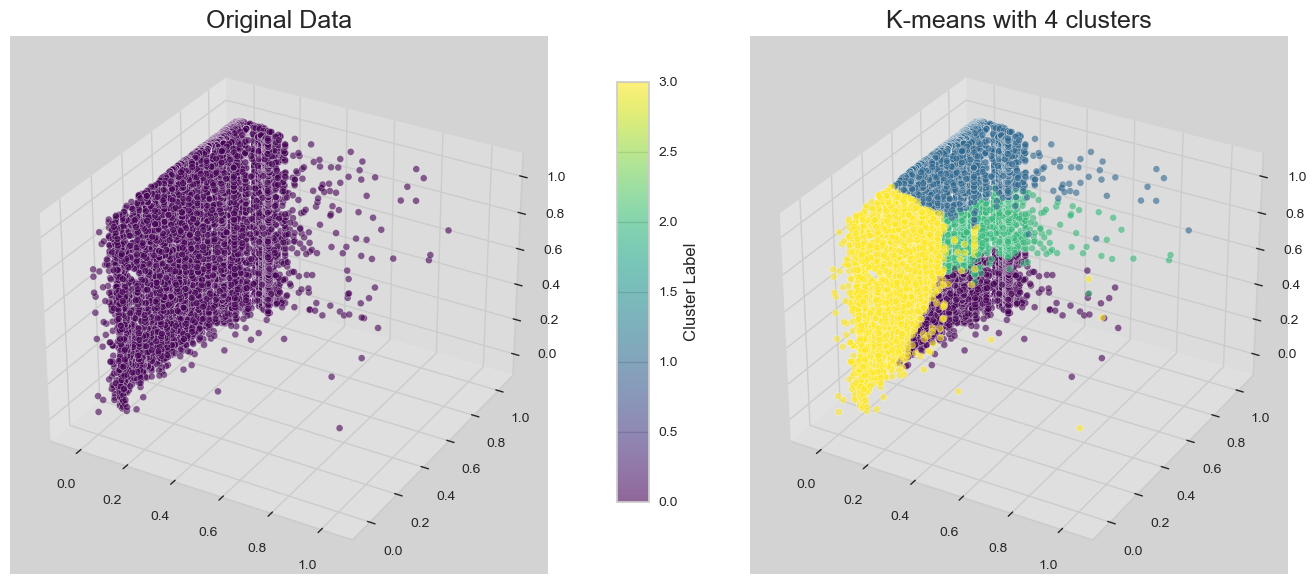

In [20]:
plt.figure(figsize=(16, 6)) 

# Original Data Scatter Plot
ax1 = plt.subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(df_kmeans['length'], df_kmeans['entropy'], df_kmeans['sha1_int3'], c=df_kmeans['list'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax1.set_title('Original Data', fontsize=18, loc='center')
# ax1.set_xlabel('Length', fontsize=10)
# ax1.set_ylabel('Entropy', fontsize=10)
# ax1.set_zlabel('sha1_int3', fontsize=10)
ax1.grid(color='gray', linestyle='-', linewidth=0.5)
ax1.set_facecolor('lightgray')  # Set background color

# K-means Scatter Plot
ax2 = plt.subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(df_kmeans['length'], df_kmeans['entropy'], df_kmeans['sha1_int3'], c=df_kmeans['km_label'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax2.set_title('K-means with 4 clusters', fontsize=18, loc='center')
# ax2.set_xlabel('Length', fontsize=10)
# ax2.set_ylabel('Entropy', fontsize=10)
# ax2.set_zlabel('sha1_int3', fontsize=10)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)
ax2.set_facecolor('lightgray')  # Set background color

# Adjusting scaling
ax1.set_xlim(df_kmeans['length'].min() - 0.1, df_kmeans['length'].max() + 0.1)
ax1.set_ylim(df_kmeans['entropy'].min() - 0.1, df_kmeans['entropy'].max() + 0.1)
ax1.set_zlim(df_kmeans['sha1_int3'].min() - 0.1, df_kmeans['sha1_int3'].max() + 0.1)

ax2.set_xlim(df_kmeans['length'].min() - 0.1, df_kmeans['length'].max() + 0.1)
ax2.set_ylim(df_kmeans['entropy'].min() - 0.1, df_kmeans['entropy'].max() + 0.1)
ax2.set_zlim(df_kmeans['sha1_int3'].min() - 0.1, df_kmeans['sha1_int3'].max() + 0.1)

# Adding colorbar between plots
cbar_ax = plt.gcf().add_axes([0.48, 0.15, 0.02, 0.7])  # [x_position, y_position, width, height]
cbar = plt.colorbar(scatter2, cax=cbar_ax)
cbar.set_label('Cluster Label', fontsize=12)

plt.tight_layout()
plt.show()

### Conclusion on K-Means:
After running the Elbow method on WCSS and Silhouette score, we concluded that the best number of clusters are four. <br>
After application of K-means on raw/unchanged data our results were poor: very high Inertia plus Silhouette Score very close to zero. <br>

## B) Fuzzy C-Means Clusterings

In [21]:
from fcmeans import FCM

In [22]:
# Convert DataFrame to NumPy array
data = df_scaled.values
data

array([[0.00168278, 0.58715122, 0.2827381 ],
       [0.01432805, 0.78183783, 0.4672619 ],
       [0.07191993, 0.80344651, 0.02380952],
       ...,
       [0.01516372, 0.86035553, 0.39781746],
       [0.02413552, 0.83453397, 0.60912698],
       [0.0652113 , 0.95645591, 0.08928571]])

In [23]:
df_scaled.head()

,length,entropy,sha1_int3
0,0.001683,0.587151,0.282738
1,0.014328,0.781838,0.467262
2,0.071920,0.803447,0.023810
3,0.013322,0.866016,0.870040
4,0.002524,0.756616,0.891865


In [24]:
# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 4)

# fit the fuzzy-c-means
fcm_model = fcm.fit(data)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_label = fcm.u.argmax(axis = 1)

In [25]:
fcm_label

array([0, 0, 1, ..., 0, 3, 1], dtype=int64)

In [26]:
unique, counts = np.unique(fcm_label, return_counts=True)
counts = counts.reshape(1,4)


countscldf_1 = pd.DataFrame(counts, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])


countscldf_1

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,28453,28852,28740,28692


In [27]:
silh_score_fcm = silhouette_score(df_scaled, fcm_label)
print('Silhoette Coefficient:',  silh_score_fcm)

Silhoette Coefficient: 0.318834776030992


In [28]:
df_fuzzy = df_scaled.head()
df_fuzzy.head()

,length,entropy,sha1_int3
0,0.001683,0.587151,0.282738
1,0.014328,0.781838,0.467262
2,0.071920,0.803447,0.023810
3,0.013322,0.866016,0.870040
4,0.002524,0.756616,0.891865


In [29]:
columns = ['fcm_label']
fcm_label = pd.DataFrame(data=fcm_label, columns=columns)
fcm_label.head()
print(fcm_label.value_counts())

fcm_label
1            28852
2            28740
3            28692
0            28453
Name: count, dtype: int64


In [30]:
df_fuzzy = pd.concat([df_fuzzy, fcm_label, y], axis=1)
df_fuzzy.head()

,length,entropy,sha1_int3,fcm_label,list
0,0.001683,0.587151,0.282738,0,0
1,0.014328,0.781838,0.467262,0,0
2,0.071920,0.803447,0.023810,1,0
3,0.013322,0.866016,0.870040,2,0
4,0.002524,0.756616,0.891865,2,0


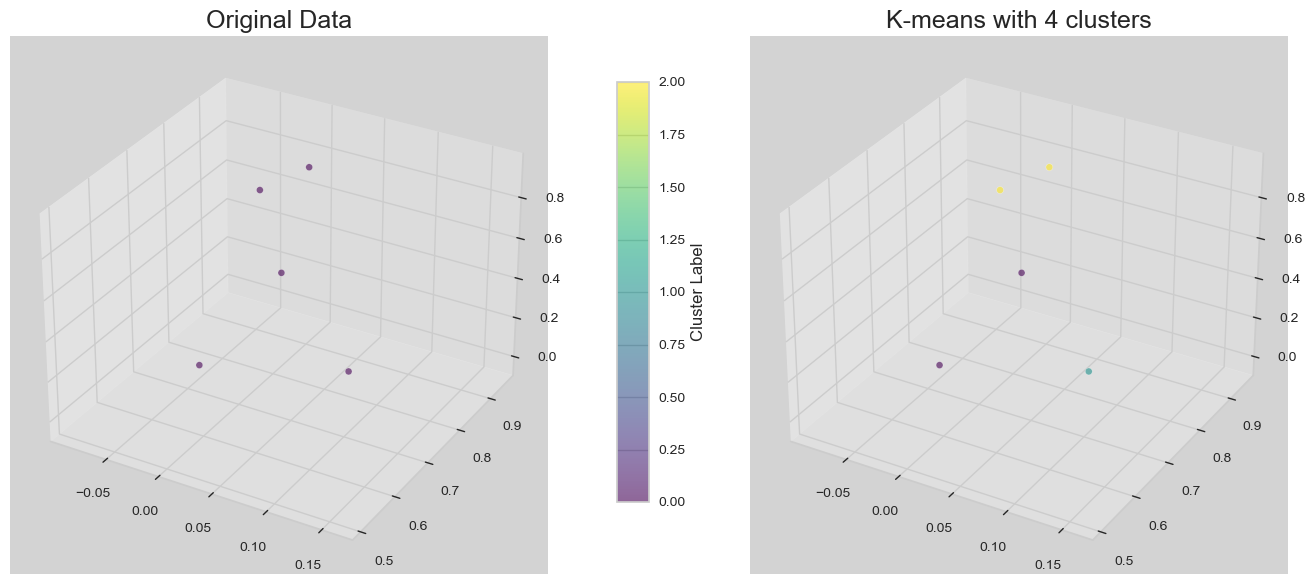

In [32]:
plt.figure(figsize=(16, 6)) 

# Original Data Scatter Plot
ax1 = plt.subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(df_fuzzy['length'], df_fuzzy['entropy'], df_fuzzy['sha1_int3'], c=df_fuzzy['list'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax1.set_title('Original Data', fontsize=18, loc='center')
# ax1.set_xlabel('Length', fontsize=10)
# ax1.set_ylabel('Entropy', fontsize=10)
# ax1.set_zlabel('sha1_int3', fontsize=10)
ax1.grid(color='gray', linestyle='-', linewidth=0.5)
ax1.set_facecolor('lightgray')  # Set background color

# K-means Scatter Plot
ax2 = plt.subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(df_fuzzy['length'], df_fuzzy['entropy'], df_fuzzy['sha1_int3'], c=df_fuzzy['fcm_label'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax2.set_title('K-means with 4 clusters', fontsize=18, loc='center')
# ax2.set_xlabel('Length', fontsize=10)
# ax2.set_ylabel('Entropy', fontsize=10)
# ax2.set_zlabel('sha1_int3', fontsize=10)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)
ax2.set_facecolor('lightgray')  # Set background color

# Adjusting scaling
ax1.set_xlim(df_fuzzy['length'].min() - 0.1, df_fuzzy['length'].max() + 0.1)
ax1.set_ylim(df_fuzzy['entropy'].min() - 0.1, df_fuzzy['entropy'].max() + 0.1)
ax1.set_zlim(df_fuzzy['sha1_int3'].min() - 0.1, df_fuzzy['sha1_int3'].max() + 0.1)

ax2.set_xlim(df_fuzzy['length'].min() - 0.1, df_fuzzy['length'].max() + 0.1)
ax2.set_ylim(df_fuzzy['entropy'].min() - 0.1, df_fuzzy['entropy'].max() + 0.1)
ax2.set_zlim(df_fuzzy['sha1_int3'].min() - 0.1, df_fuzzy['sha1_int3'].max() + 0.1)

# Adding colorbar between plots
cbar_ax = plt.gcf().add_axes([0.48, 0.15, 0.02, 0.7])  # [x_position, y_position, width, height]
cbar = plt.colorbar(scatter2, cax=cbar_ax)
cbar.set_label('Cluster Label', fontsize=12)

plt.tight_layout()
plt.show()